In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()


In [2]:
df=pdr.get_data_yahoo("GOOGL",start="2010-01-01",end="2019-01-01")
print(df)

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2010-01-04  15.689439  15.753504  15.621622  15.684434  15.684434   78169752
2010-01-05  15.695195  15.711712  15.554054  15.615365  15.615365  120067812
2010-01-06  15.662162  15.662162  15.174174  15.221722  15.221722  158988852
2010-01-07  15.250250  15.265265  14.831081  14.867367  14.867367  256315428
2010-01-08  14.814815  15.096346  14.742492  15.065566  15.065566  188783028
...               ...        ...        ...        ...        ...        ...
2018-12-24  49.216000  50.605999  48.882999  49.233501  49.233501   36360000
2018-12-26  49.899502  52.422501  49.632500  52.392502  52.392502   46318000
2018-12-27  51.310001  52.667000  50.349998  52.645000  52.645000   45996000
2018-12-28  52.974998  53.211498  52.099998  52.334000  52.334000   34398000
2018-12

In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-24,49.216000,50.605999,48.882999,49.233501,49.233501,36360000
2018-12-26,49.899502,52.422501,49.632500,52.392502,52.392502,46318000
2018-12-27,51.310001,52.667000,50.349998,52.645000,52.645000,45996000
2018-12-28,52.974998,53.211498,52.099998,52.334000,52.334000,34398000
2018-12-31,52.891499,53.149502,51.652000,52.248001,52.248001,33110000


In [4]:
df=df.reset_index()
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
1,2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2,2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
3,2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
4,2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028


In [5]:
df=df.drop(['Date','Adj Close'], axis=1)
df.head()


,Open,High,Low,Close,Volume
0,15.689439,15.753504,15.621622,15.684434,78169752
1,15.695195,15.711712,15.554054,15.615365,120067812
2,15.662162,15.662162,15.174174,15.221722,158988852
3,15.250250,15.265265,14.831081,14.867367,256315428
4,14.814815,15.096346,14.742492,15.065566,188783028


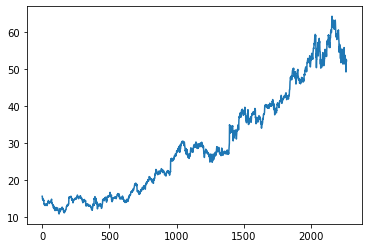

In [6]:
plt.plot(df.Close)

In [7]:
df

,Open,High,Low,Close,Volume
0,15.689439,15.753504,15.621622,15.684434,78169752
1,15.695195,15.711712,15.554054,15.615365,120067812
2,15.662162,15.662162,15.174174,15.221722,158988852
3,15.250250,15.265265,14.831081,14.867367,256315428
4,14.814815,15.096346,14.742492,15.065566,188783028
...,...,...,...,...,...
2259,49.216000,50.605999,48.882999,49.233501,36360000
2260,49.899502,52.422501,49.632500,52.392502,46318000
2261,51.310001,52.667000,50.349998,52.645000,45996000
2262,52.974998,53.211498,52.099998,52.334000,34398000


In [8]:
ma100=df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2259    56.858700
2260    56.762060
2261    56.669430
2262    56.573935
2263    56.468495
Name: Close, Length: 2264, dtype: float64

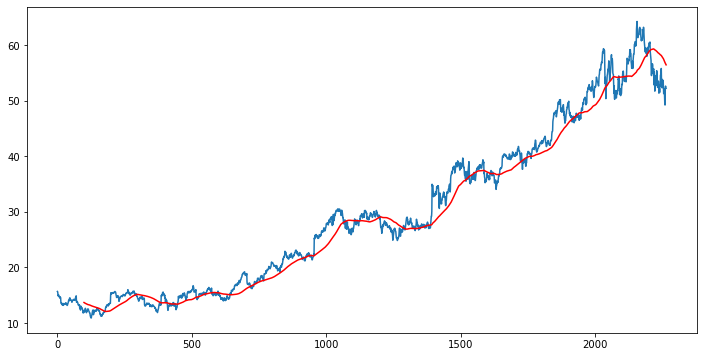

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [10]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2259    56.252770
2260    56.223250
2261    56.201497
2262    56.175945
2263    56.149532
Name: Close, Length: 2264, dtype: float64

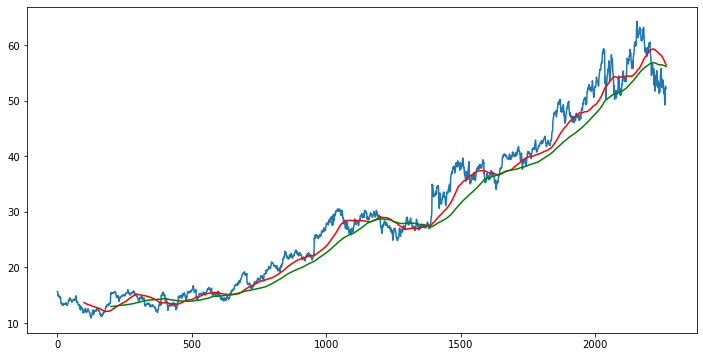

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')


In [12]:
df.shape

(2264, 5)

In [13]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)


(1584, 1)
(680, 1)


In [14]:
data_training.head()


,Close
0,15.684434
1,15.615365
2,15.221722
3,14.867367
4,15.065566


In [15]:
data_testing.head()

,Close
1584,38.745998
1585,39.000000
1586,36.888500
1587,37.110500
1588,36.268501


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))


In [17]:
data_training_array=scaler.fit_transform(data_training)
data_training_array


array([[0.16577087],
       [0.16337142],
       [0.14969628],
       ...,
       [0.97575148],
       [0.98909157],
       [0.96923775]])

In [18]:
data_training_array.shape

(1584, 1)

In [21]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train =np.array(x_train),np.array(y_train)

In [23]:
x_train.shape

(1484, 100, 1)

In [22]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [24]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [27]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
47/47 [==============================] - 21s 295ms/step - loss: 0.0503
Epoch 2/50
47/47 [==============================] - 13s 276ms/step - loss: 0.0088
Epoch 3/50
47/47 [==============================] - 13s 279ms/step - loss: 0.0071
Epoch 4/50
47/47 [==============================] - 13s 278ms/step - loss: 0.0079
Epoch 5/50
47/47 [==============================] - 13s 275ms/step - loss: 0.0073
Epoch 6/50
47/47 [==============================] - 13s 275ms/step - loss: 0.0063
Epoch 7/50
47/47 [==============================] - 13s 276ms/step - loss: 0.0061
Epoch 8/50
47/47 [==============================] - 13s 275ms/step - loss: 0.0061
Epoch 9/50
47/47 [==============================] - 13s 275ms/step - loss: 0.0053
Epoch 10/50
47/47 [==============================] - 13s 279ms/step - loss: 0.0057
Epoch 11/50
47/47 [==============================] - 13s 279ms/step - loss: 0.0052
Epoch 12/50
47/47 [==============================] - 13s 279ms/step - loss: 0.0058
Epoch 13/50
4

In [28]:
model.save('keras_model.h5')

In [29]:
data_testing.head()

,Close
1584,38.745998
1585,39.000000
1586,36.888500
1587,37.110500
1588,36.268501


In [30]:
data_training.tail(100)

,Close
1484,38.481499
1485,38.463001
1486,38.598499
1487,38.142502
1488,39.189499
...,...
1579,38.595501
1580,38.769501
1581,39.000000
1582,39.383999


In [31]:
past_100_days=data_training.tail(100)

In [32]:
final_df=past_100_days.append(data_testing,ignore_index=True)

C:\Users\MANAS RANJAN GIRI\AppData\Local\Temp\ipykernel_7816\3595571042.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


In [33]:
final_df.head()

,Close
0,38.481499
1,38.463001
2,38.598499
3,38.142502
4,39.189499


In [34]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.14641933],
       [0.14580719],
       [0.15029121],
       [0.13520095],
       [0.16984907],
       [0.16002059],
       [0.14405322],
       [0.16227081],
       [0.15197903],
       [0.15553645],
       [0.13470445],
       [0.13055131],
       [0.11463368],
       [0.13468791],
       [0.13063412],
       [0.15793563],
       [0.14675032],
       [0.12527299],
       [0.1318089 ],
       [0.14228272],
       [0.14456613],
       [0.14014827],
       [0.1672844 ],
       [0.18667689],
       [0.18062081],
       [0.16028532],
       [0.12955856],
       [0.13301676],
       [0.12937652],
       [0.09904692],
       [0.08235166],
       [0.08592561],
       [0.10622804],
       [0.06358796],
       [0.08314583],
       [0.04856385],
       [0.06277713],
       [0.06191681],
       [0.07533591],
       [0.10642661],
       [0.08683567],
       [0.08711693],
       [0.06029526],
       [0.11112587],
       [0.13271896],
       [0.14830572],
       [0.1650838 ],
       [0.112

In [35]:
input_data.shape

(780, 1)

In [36]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [37]:
x_test,y_test=np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(680, 100, 1)
(680,)


# making prediction

In [38]:
y_predicted=model.predict(x_test)

22/22 [==============================] - 3s 73ms/step


In [39]:
y_predicted.shape

(680, 1)

In [40]:
y_test

array([0.15517237, 0.16357801, 0.09370246, 0.10104907, 0.07318492,
       0.06671529, 0.03957903, 0.04424521, 0.05505002, 0.0451718 ,
       0.0500199 , 0.0555464 , 0.07287046, 0.07940637, 0.09636648,
       0.08175593, 0.0776524 , 0.0722914 , 0.08134225, 0.06461378,
       0.06724473, 0.05653914, 0.06712885, 0.05974915, 0.08585946,
       0.09424844, 0.09231256, 0.10996762, 0.11203593, 0.11139059,
       0.10445766, 0.09054206, 0.0809451 , 0.08264945, 0.10224039,
       0.10156198, 0.08612419, 0.08395666, 0.08622341, 0.08446957,
       0.07133173, 0.03823887, 0.04134953, 0.04589983, 0.04853065,
       0.05581112, 0.00671782, 0.        , 0.016745  , 0.02324771,
       0.03704743, 0.0481667 , 0.03929777, 0.04604879, 0.04321926,
       0.06062614, 0.07621289, 0.08499902, 0.07998543, 0.09044283,
       0.09016157, 0.11923358, 0.11958112, 0.1256536 , 0.12123574,
       0.12929384, 0.12638163, 0.12659674, 0.13374478, 0.14014827,
       0.18234171, 0.19822626, 0.19686944, 0.19488383, 0.19212

In [41]:
scaler.scale_

array([0.03309286])

In [42]:
scale_factor=1/0.02099517
y_predicted=y_predicted * scale_factor
y_test=y_test * scale_factor

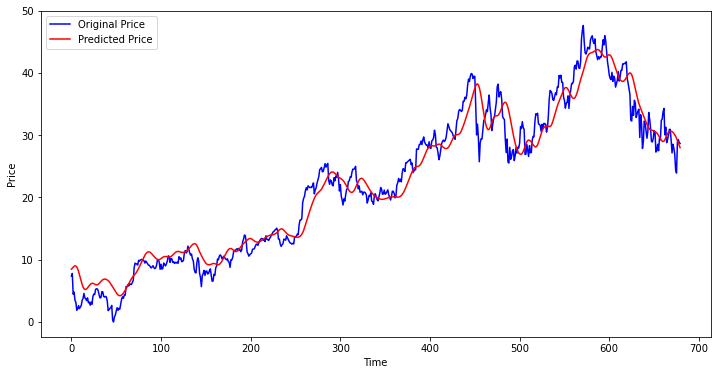

In [43]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()